Importing Libraries

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


Reading File

In [300]:
df = pd.read_excel('Sample - Superstore.xls')

In [301]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [303]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [304]:
df['Country/Region'].nunique()

1

In [305]:
df.drop(columns = ['Country/Region'],inplace = True)

In [306]:
df.drop(columns = ['Row ID', 'Order ID'],inplace = True)

In [307]:
df.drop(columns = ['Postal Code'],inplace = True)

In [308]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [309]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [310]:
df['month']=df['Order Date'].dt.month

In [311]:
df['year'] = df['Order Date'].dt.year

In [312]:
df['Profit Percentage'] = (df['Profit']/df['Sales']) * 100

<AxesSubplot:ylabel='Category'>

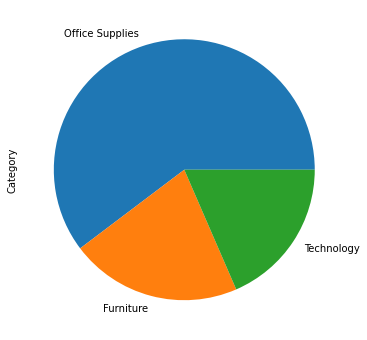

In [313]:
df['Category'].value_counts().plot(kind = 'pie', figsize = (12,6))

<AxesSubplot:ylabel='Sales'>

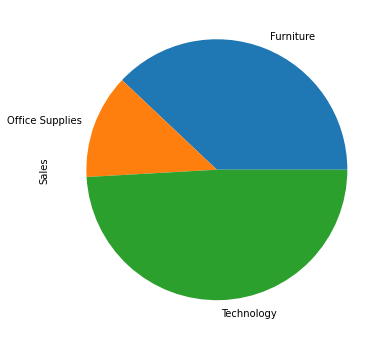

In [314]:
df.groupby('Category')['Sales'].mean().plot(kind = 'pie', figsize = (12,6))

<AxesSubplot:title={'center':'Number of times a product(s) from the Category is Ordered'}, xlabel='Category'>

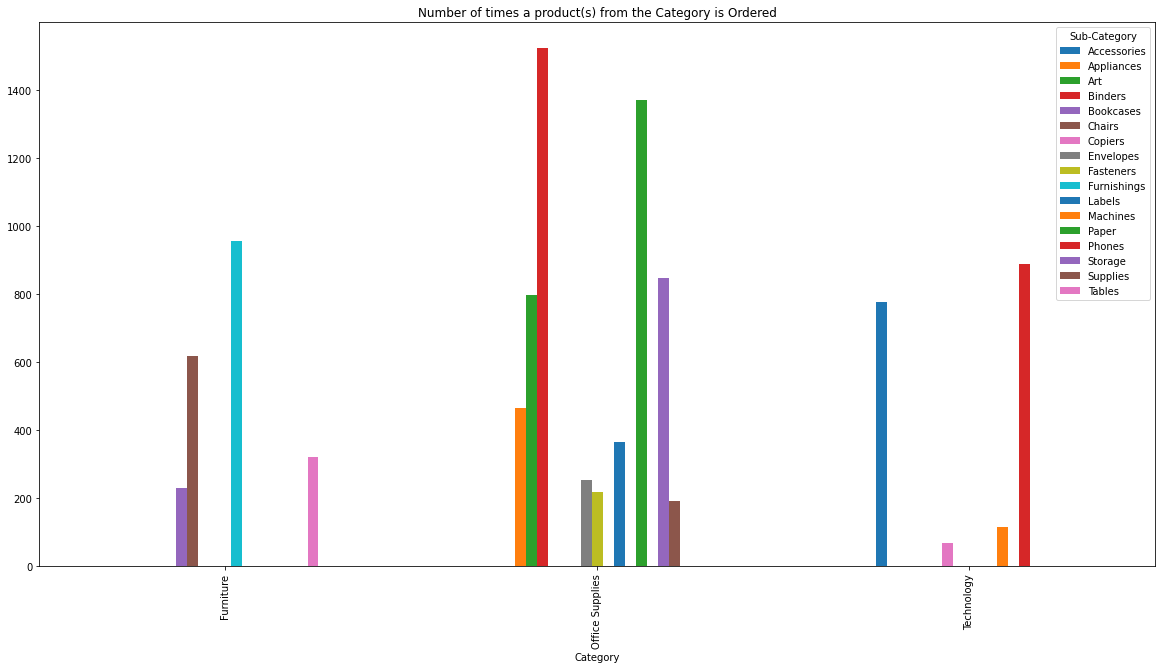

In [315]:
(df.groupby('Category')['Sub-Category'].value_counts()).unstack().plot(kind = 'bar', figsize = (20,10), title = 'Number of times a product(s) from the Category is Ordered')

<AxesSubplot:title={'center':'Average Sales per Category'}, xlabel='Category'>

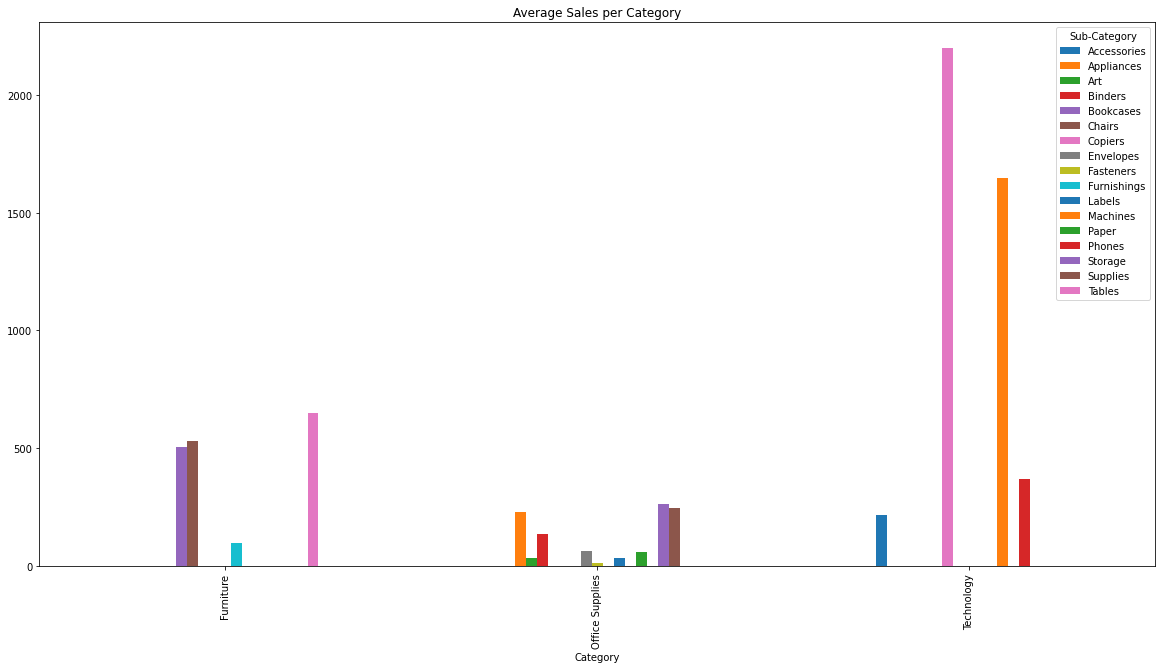

In [316]:
(df.groupby(['Category','Sub-Category'])['Sales'].mean()).unstack().plot(kind = 'bar', figsize = (20,10),title = 'Average Sales per Category')

In [234]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Profit Percentage
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2019,16.00
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2019,30.00
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2019,47.00
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2018,-40.00
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2018,11.25


<AxesSubplot:title={'center':'Monthly and Yearly Sales Average'}, xlabel='year,month'>

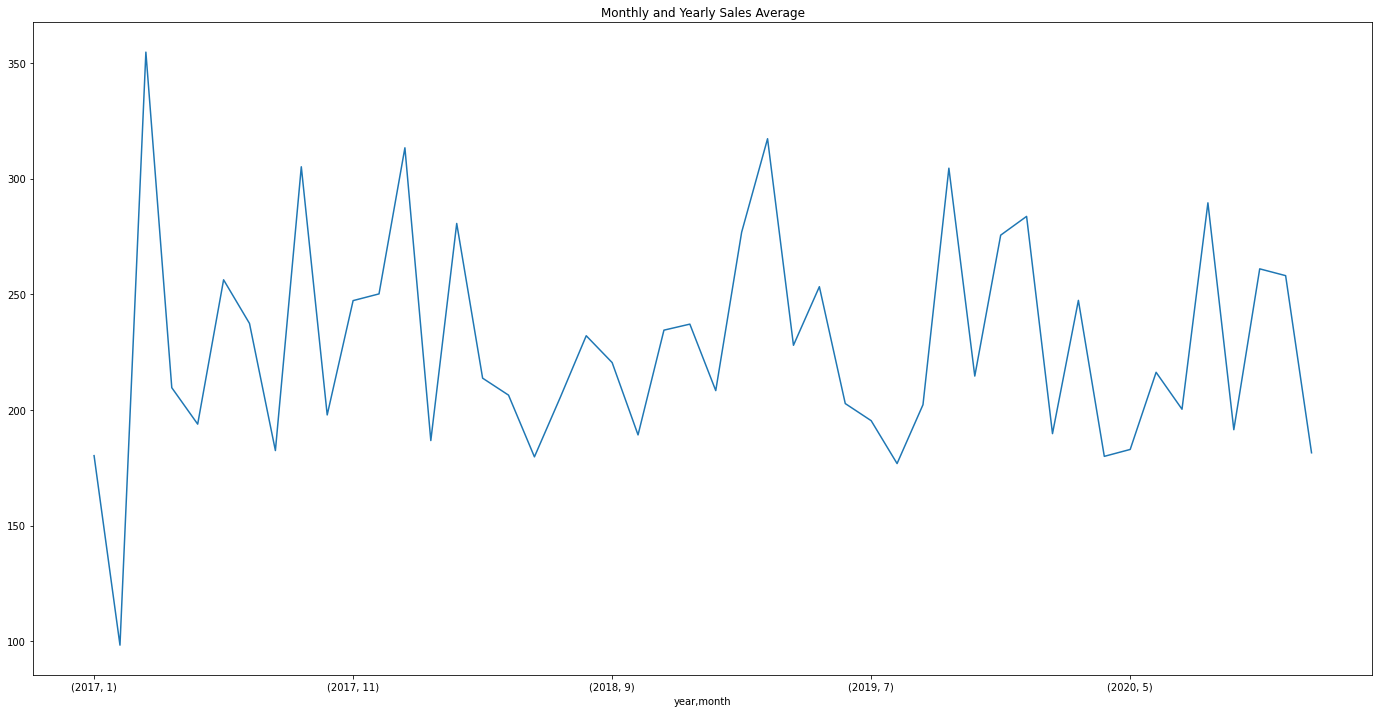

In [235]:
df.groupby(['year','month'])['Sales'].mean().plot(figsize = (24,12), title = 'Monthly and Yearly Sales Average')

<AxesSubplot:title={'center':'Monthly and Yearly Average Profits'}, xlabel='year,month'>

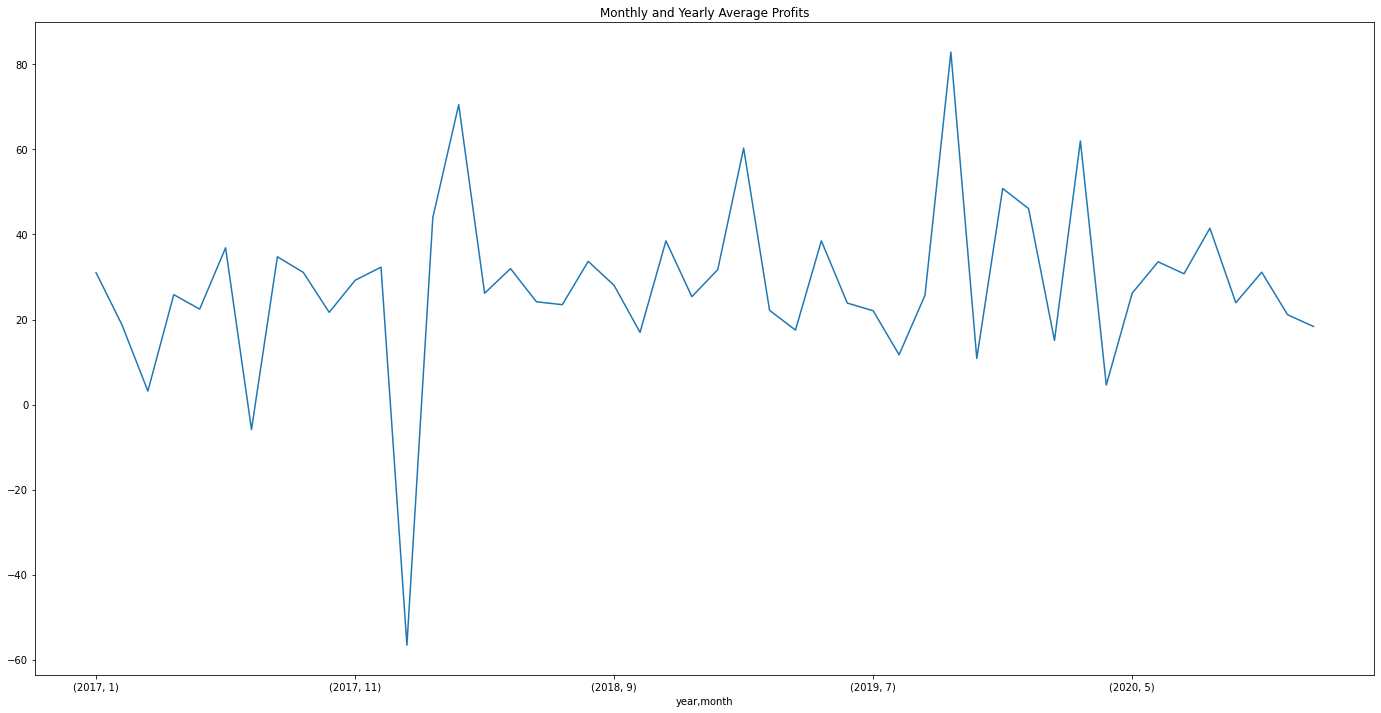

In [236]:
df.groupby(['year','month'])['Profit'].mean().plot(figsize = (24,12), title = 'Monthly and Yearly Average Profits')

<AxesSubplot:title={'center':'Monthly and Yearly Average Profit Margin'}, xlabel='year,month'>

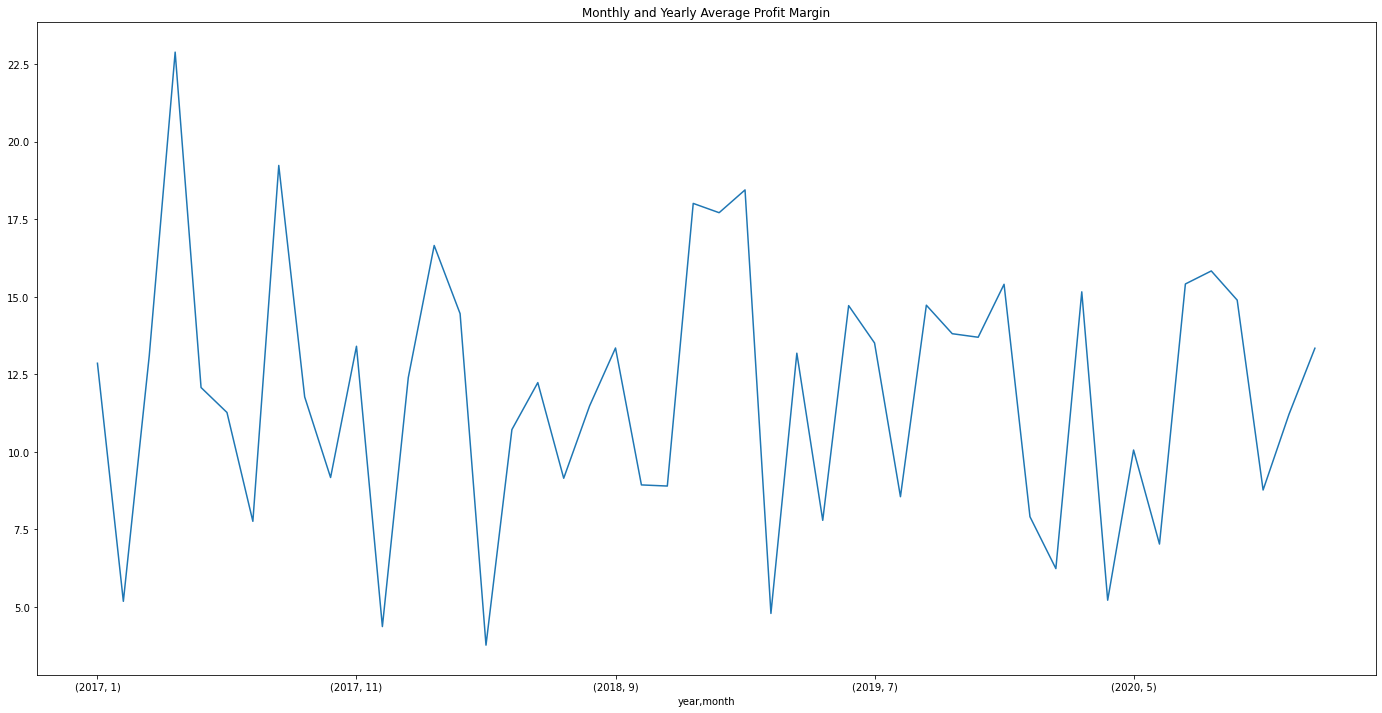

In [237]:
df.groupby(['year','month'])['Profit Percentage'].mean().plot(figsize = (24,12), title = 'Monthly and Yearly Average Profit Margin')

<AxesSubplot:title={'center':'Sales by Category'}, xlabel='Category'>

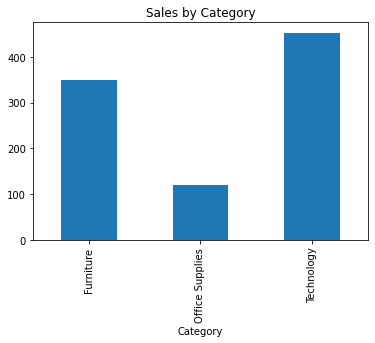

In [238]:
df.groupby('Category')['Sales'].mean().plot(kind = 'bar', title = 'Sales by Category')

<AxesSubplot:title={'center':'Profit by Category'}, xlabel='Category'>

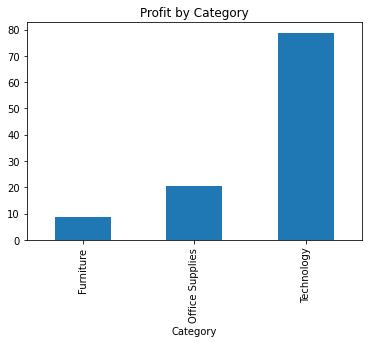

In [239]:
df.groupby('Category')['Profit'].mean().plot(kind = 'bar',title = 'Profit by Category')

In [324]:
def func():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending = False).plot(kind = 'bar', ylabel = 'Sales in Dollars' ,subplots = True)
        plt.show()
    


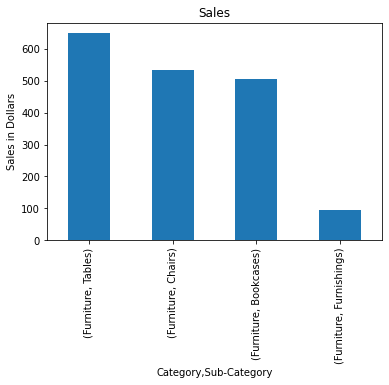

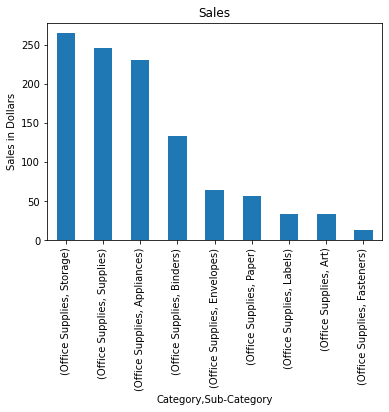

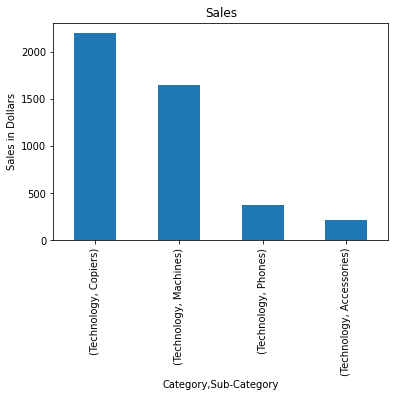

In [325]:
func()

In [320]:
def func2():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Profit'].mean().sort_values(ascending = False).plot(kind = 'bar', ylabel = 'Profit in Dollars', subplots = True)
        plt.show()
    


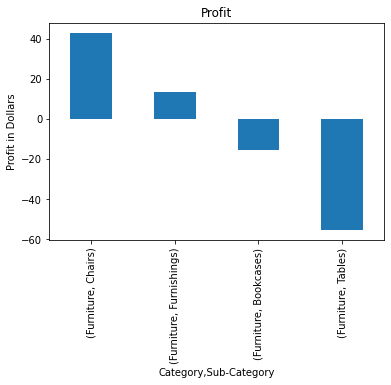

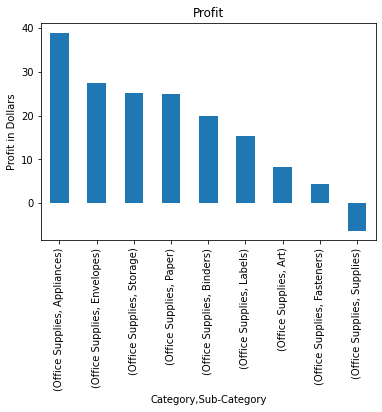

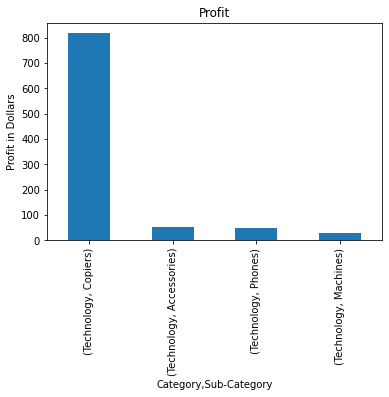

In [321]:
func2()

In [233]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:title={'center':'Sales per Segment'}, xlabel='Segment'>

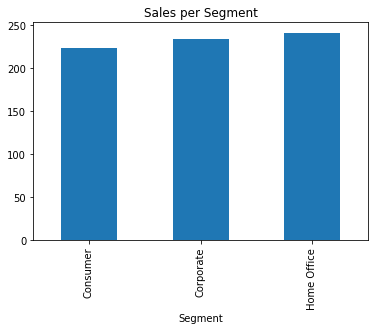

In [286]:
df.groupby('Segment')['Sales'].mean().plot(kind = 'bar', title = 'Sales per Segment')

<AxesSubplot:title={'center':'Profit per Segment'}, xlabel='Segment'>

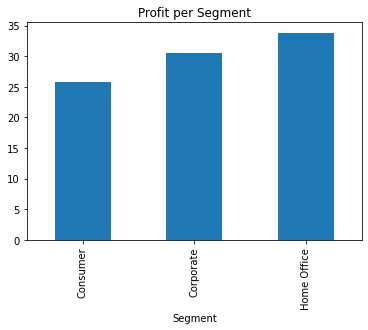

In [287]:
df.groupby('Segment')['Profit'].mean().plot(kind = 'bar', title = 'Profit per Segment')

<AxesSubplot:xlabel='year'>

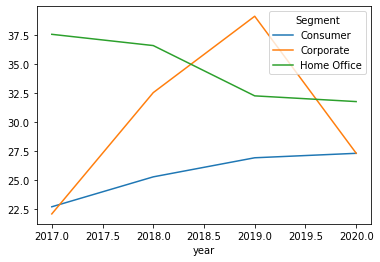

In [283]:
df.groupby(['year','Segment'])['Profit'].mean().unstack().plot()

In [250]:
df.groupby(['Product Name'], as_index = False)['Profit'].mean().sort_values(by = 'Profit', ascending = False).head(15)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,5039.985600
405,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.990000
165,Ativa V4110MDD Micro-Cut Shredder,1886.473050
19,"3D Systems Cube Printer, 2nd Generation, Magenta",1858.985700
1839,Zebra ZM400 Thermal Label Printer,1671.768000
811,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.205000
806,Hewlett-Packard Deskjet 3050a All-in-One Color...,1459.200000
786,HP Designjet T520 Inkjet Large Format Printer ...,1364.992200
400,Canon PC1060 Personal Laser Copier,1142.733675
894,Ibico EPK-21 Electric Binding System,1115.094100


In [136]:
b = df.groupby(['Product Name'], as_index = False)['Profit'].mean().sort_values(by = 'Profit').head(30)

In [137]:
b

,Product Name,Profit
476,Cubify CubeX 3D Printer Triple Head Print,-3839.990400
475,Cubify CubeX 3D Printer Double Head Print,-2959.990133
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.078400
984,Lexmark MX611dhe Monochrome Laser Printer,-1147.493250
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.280000
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-575.223120
602,Epson TM-T88V Direct Thermal Printer - Monochr...,-528.615000
364,BoxOffice By Design Rectangular and Half-Moon ...,-382.812500
969,LG G2,-374.992500
372,"Brother MFC-9340CDW LED All-In-One Printer, Co...",-319.191600


<AxesSubplot:xlabel='year,month'>

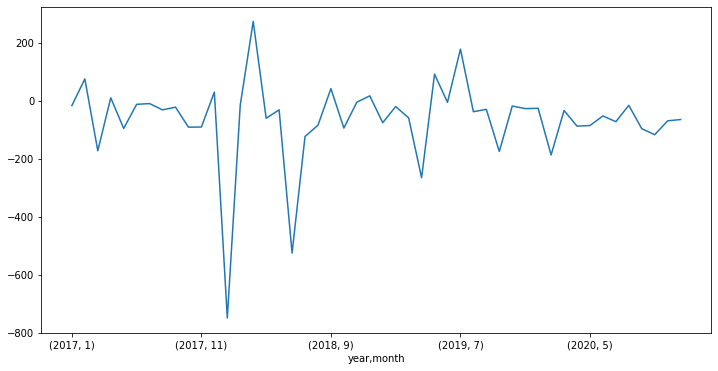

In [32]:
df[df['Sub-Category']=='Tables'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

In [249]:
df.groupby(['Sub-Category'], as_index = False)['Profit'].mean().sort_values(by ='Profit').head(15)

,Sub-Category,Profit
16,Tables,-55.565771
4,Bookcases,-15.230509
15,Supplies,-6.258418
8,Fasteners,4.375660
2,Art,8.200737
9,Furnishings,13.645918
10,Labels,15.236962
3,Binders,19.843574
12,Paper,24.856620
14,Storage,25.152277


In [248]:
df.groupby(['Sub-Category'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage').head(15)

,Sub-Category,Profit Percentage
3,Binders,-19.959510
1,Appliances,-15.686934
16,Tables,-14.772653
4,Bookcases,-12.664007
11,Machines,-7.202622
5,Chairs,4.389963
14,Storage,8.911348
15,Supplies,11.203947
13,Phones,11.922197
9,Furnishings,13.706635


In [247]:
df.groupby(['Sub-Category'], as_index = False)['Profit'].mean().sort_values(by = 'Profit', ascending = False).head(15)

,Sub-Category,Profit
6,Copiers,817.909190
0,Accessories,54.111788
13,Phones,50.073938
5,Chairs,43.095894
1,Appliances,38.922758
11,Machines,29.432669
7,Envelopes,27.418019
14,Storage,25.152277
12,Paper,24.856620
3,Binders,19.843574


In [246]:
df.groupby(['Sub-Category'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage' ,ascending = False).head(15)

,Sub-Category,Profit Percentage
10,Labels,42.966346
12,Paper,42.560036
7,Envelopes,42.313976
6,Copiers,31.719363
8,Fasteners,29.917051
2,Art,25.164573
0,Accessories,21.820968
9,Furnishings,13.706635
13,Phones,11.922197
15,Supplies,11.203947


In [251]:
a = df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage').head(30)

In [244]:
a

,Product Name,Profit Percentage
604,Eureka Disposable Bags for Sanitaire Vibra Gro...,-275.000000
388,"Bush Westfield Collection Bookcases, Dark Cher...",-210.000000
612,Euro Pro Shark Stick Mini Vacuum,-177.500000
17,3.6 Cubic Foot Counter Height Office Refrigerator,-148.400000
1214,Okidata B401 Printer,-140.000000
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-133.333333
861,Hoover Commercial Lightweight Upright Vacuum,-131.250000
947,Kensington 6 Outlet SmartSocket Surge Protector,-125.000000
50,Acco 6 Outlet Guardian Basic Surge Suppressor,-116.000000
51,Acco 6 Outlet Guardian Premium Plus Surge Supp...,-113.000000


In [245]:
df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage' ,ascending = False).head(15)

,Product Name,Profit Percentage
1672,Xerox 1890,50.0
1473,Southworth Structures Collection,50.0
109,Adams Telephone Message Book w/Frequently-Call...,50.0
1566,Tops Green Bar Computer Printout Paper,50.0
181,Avery 475,50.0
405,Canon imageCLASS MF7460 Monochrome Digital Las...,50.0
1757,Xerox 1969,49.0
1777,Xerox 1987,49.0
208,Avery 5,49.0
1702,Xerox 1918,49.0


In [34]:
df.groupby(['Region'])['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales per Region'}, xlabel='Region'>

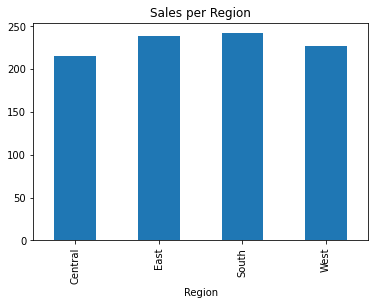

In [270]:
df.groupby(['Region'])['Sales'].mean().plot(kind = 'bar', title= 'Sales per Region')

In [35]:
df.groupby(['Region'])['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

<AxesSubplot:title={'center':'Profit per Region'}, xlabel='Region'>

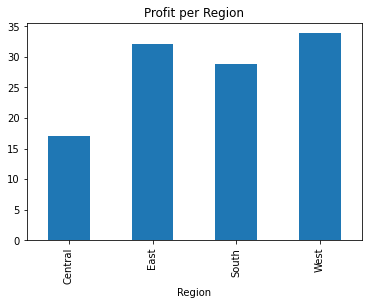

In [271]:
df.groupby(['Region'])['Profit'].mean().plot(kind = 'bar', title = 'Profit per Region')

<AxesSubplot:title={'center':'Profit Margin per Region'}, xlabel='Region'>

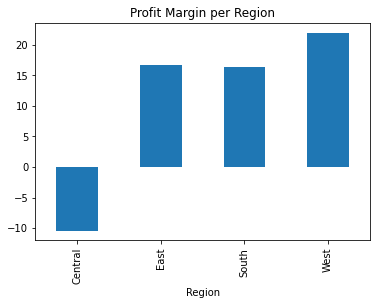

In [272]:
df.groupby(['Region'])['Profit Percentage'].mean().plot(kind = 'bar', title = 'Profit Margin per Region')

<AxesSubplot:title={'center':'Sales per Year'}, xlabel='year'>

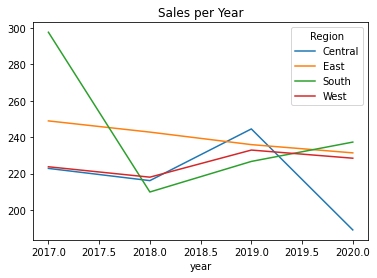

In [273]:
df.groupby(['year','Region'])['Sales'].mean().unstack().plot(title= 'Sales per Year')

<AxesSubplot:title={'center':'Profit per Year'}, xlabel='year'>

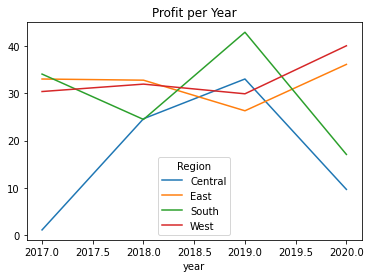

In [274]:
df.groupby(['year','Region'])['Profit'].mean().unstack().plot(title= 'Profit per Year')

<AxesSubplot:title={'center':'States with the lowest Profits'}, xlabel='State'>

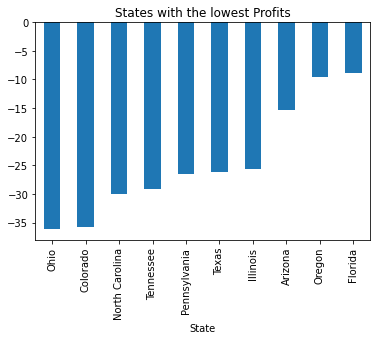

In [275]:
df.groupby(['State'])['Profit'].mean().sort_values().head(10).plot(kind = 'bar', title = 'States with the lowest Profits')

<AxesSubplot:title={'center':'States with the lowest Profit Margins'}, xlabel='State'>

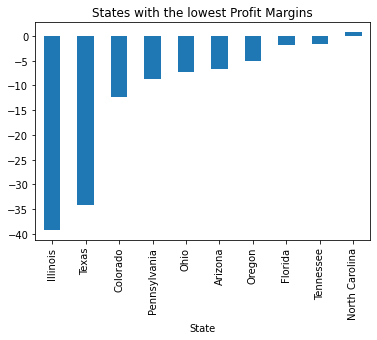

In [276]:
df.groupby(['State'])['Profit Percentage'].mean().sort_values().head(10).plot(kind = 'bar',title = 'States with the lowest Profit Margins')

<AxesSubplot:title={'center':'States with the highest Profits'}, xlabel='State'>

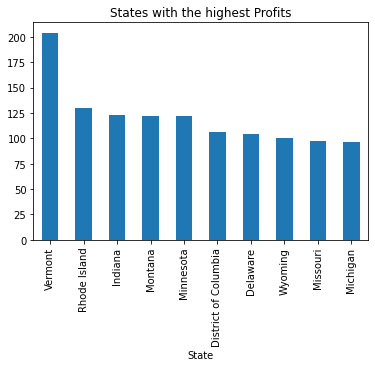

In [277]:
df.groupby(['State'])['Profit'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar',title = 'States with the highest Profits')

<AxesSubplot:title={'center':'States with the highest Profit Margins'}, xlabel='State'>

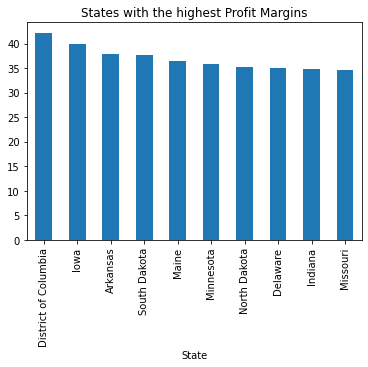

In [278]:
df.groupby(['State'])['Profit Percentage'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar',title = 'States with the highest Profit Margins')

<AxesSubplot:xlabel='year,month'>

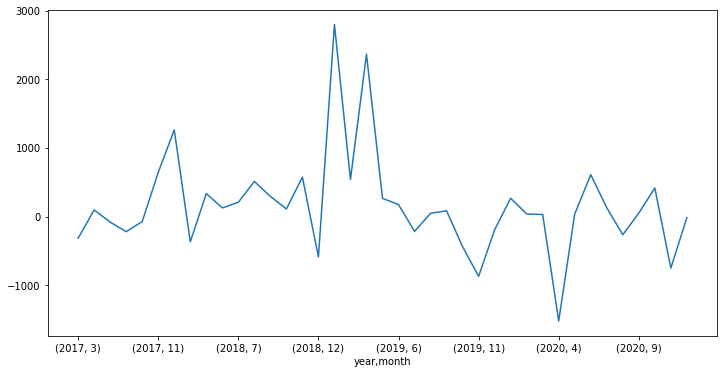

In [46]:
df[df['Sub-Category']=='Machines'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

In [108]:
df[df['Sub-Category']=='Tables']['Profit'].sum()

-17725.481100000005

In [148]:
for c in a.index:
    
    d = df.drop(df[df['Product Name'] == c].index)

In [149]:
for c in b['Product Name']:
    
    d = d.drop(d[d['Product Name'] == c].index)

In [256]:
d.drop(d[d['Sub-Category']== 'Tables'].index, inplace = True)

In [257]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9612 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Date         9612 non-null   datetime64[ns]
 1   Ship Date          9612 non-null   datetime64[ns]
 2   Ship Mode          9612 non-null   object        
 3   Customer ID        9612 non-null   object        
 4   Customer Name      9612 non-null   object        
 5   Segment            9612 non-null   object        
 6   City               9612 non-null   object        
 7   State              9612 non-null   object        
 8   Region             9612 non-null   object        
 9   Product ID         9612 non-null   object        
 10  Category           9612 non-null   object        
 11  Sub-Category       9612 non-null   object        
 12  Product Name       9612 non-null   object        
 13  Sales              9612 non-null   float64       
 14  Quantity

In [258]:
d['Profit'].sum()

334970.97439999995

In [288]:
d['Profit'].mean()

34.849248272992085

In [259]:
df['Profit'].sum()

286397.0216999999

In [289]:
df['Profit'].mean()

28.656896307784663

<AxesSubplot:title={'center':'Profits by year'}, xlabel='year'>

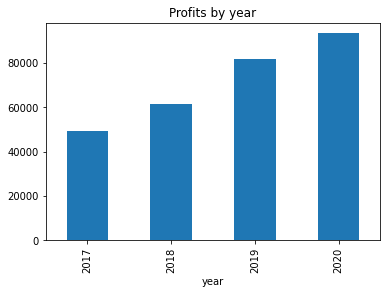

In [297]:
df.groupby('year')['Profit'].sum().plot(kind = 'bar', title = 'Profits by year')

<AxesSubplot:title={'center':'Profits by year'}, xlabel='year'>

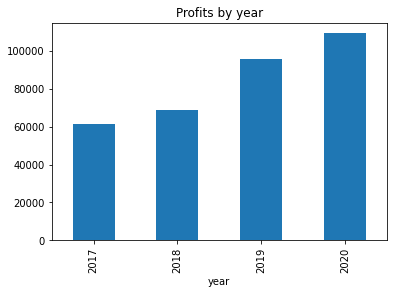

In [298]:
d.groupby('year')['Profit'].sum().plot(kind = 'bar',title = 'Profits by year')